# 6.6 Sourcing & Analyzing Time-Series Data

### This script contains the following:

#### 1. Importing your libraries and data
#### 2. Subsetting, wrangling, and cleaning time-series data
#### 3. Time series analysis: decomposition
#### 4. Testing for stationarity
#### 5. Stationarizing the Federal Reserve Economic Data

### 1. Importing your libraries and data

In [1]:
#Importing libraries and data

import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm # Using .api imports the public access version of statsmodels, which is a library that handles 
# statistical models.
import os
import warnings # This is a library that handles warnings.

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') # This is a styling option for how your plots will appear. More examples here:
# https://matplotlib.org/3.2.1/tutorials/introductory/customizing.html
# https://matplotlib.org/3.1.0/gallery/style_sheets/fivethirtyeight.html

In [2]:
path = r'C:\Users\jmowe\OneDrive\Project 6 CF'

In [3]:
df = pd.read_csv(os.path.join(path,'Data', 'df_clean.csv'))

### 2. Subsetting, wrangling, and cleaning time-series data

In [4]:
df.shape

(3554525, 46)

In [5]:
df = df.drop('Unnamed: 0', axis=1)

In [9]:
#I'm going to convert the weather timestamp column into a date column as it seems the most intuitive option, and the weather timestamp itself does not give us any real relevant information about the 
#weather. I chose the average weather temperature for the sake of this exercises' demands.

In [6]:
df = df.rename(columns={'Weather_Timestamp': 'Date'})

In [7]:
unique_values = df['Date'].unique()
print(unique_values)

['2016-02-08 00:53:00' '2016-02-08 07:53:00' '2016-02-08 11:51:00' ...
 '2019-08-23 13:52:00' '2019-08-23 12:58:00' '2019-08-23 20:50:00']


In [18]:
df['Date'].dtype

dtype('O')

In [18]:
# Creating a new df for date as index

df_2 = df.reset_index()

In [19]:
df_2.head()

,index,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,0,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,...,0,0,0,0,0,0,0,0,0,0
1,1,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,...,0,0,0,0,0,0,1,1,1,1
2,2,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,...,0,0,0,0,0,0,1,1,1,1
3,3,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,...,0,0,0,0,0,0,1,1,1,1
4,4,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,...,0,0,0,0,0,0,1,1,1,1


In [20]:
# Set the "Date" column as the index

from datetime import datetime

df_2['datetime'] = pd.to_datetime(df_2 ['Date']) # Create a datetime column from "Date.""
df_2 = df_2 .set_index('datetime') # Set the datetime as the index of the dataframe.
df_2.drop(['Date'], axis=1, inplace=True) # Drop the "Date" column.
df_2 .head()

,index,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
datetime,,,,,,,,,,,,,,,,,,,,,
2016-02-08 00:53:00,0,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,...,0,0,0,0,0,0,0,0,0,0
2016-02-08 07:53:00,1,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,...,0,0,0,0,0,0,1,1,1,1
2016-02-08 11:51:00,2,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,...,0,0,0,0,0,0,1,1,1,1
2016-02-08 15:12:00,3,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,...,0,0,0,0,0,0,1,1,1,1
2016-02-08 15:47:00,4,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,...,0,0,0,0,0,0,1,1,1,1


In [21]:
#Creating a subset of only integers or float 64 for following step
data_types = df_2.dtypes

In [22]:
mask = (data_types == np.int64) | (data_types == np.float64)

In [23]:
df_2 = df_2.loc[:, mask]


In [30]:
Date_TemperatureAvg = df_2[['Temperature(F)']].copy()

In [42]:
Date_TemperatureAvg.head()

,Temperature(F)
datetime,
2016-01-14,31.0
2016-01-15,NaN
2016-01-16,NaN
2016-01-17,NaN
2016-01-18,NaN


In [41]:
# Resample the DataFrame to daily frequency and calculate the average value for each day
Date_TemperatureAvg = Date_TemperatureAvg.resample('D').mean()

In [43]:
# Drop rows with missing values
Date_TemperatureAvg.dropna(inplace=True)

In [44]:
Date_TemperatureAvg.head(30)

,Temperature(F)
datetime,
2016-01-14,31.000000
2016-02-08,33.330000
2016-02-09,24.400000
2016-02-10,18.419048
2016-02-11,16.847368
2016-02-12,19.325000
2016-02-13,10.400000
2016-02-14,9.050000
2016-02-15,30.275000


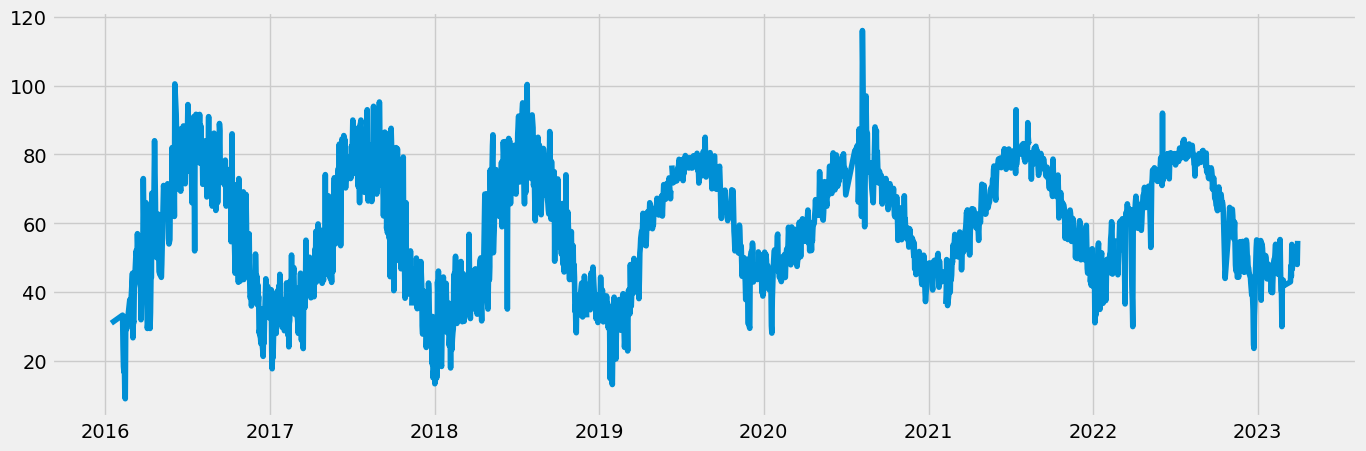

In [45]:
# Plot the new data set

plt.rcParams['agg.path.chunksize'] = 200  # Increase the chunksize value

plt.figure(figsize=(15,5), dpi=100)
plt.plot(Date_TemperatureAvg)

In [46]:
# Check for missing values (you shouldn't have any)

Date_TemperatureAvg.isnull().sum() 

Temperature(F)    0
dtype: int64

In [47]:
# Check for duplicates

dups = Date_TemperatureAvg.duplicated()
dups.sum()



206

### 3. Time-series analysis: decomposition

In [48]:
# Decompose the time series using an additive model

decomposition = sm.tsa.seasonal_decompose(Date_TemperatureAvg, model='additive', period=365)

In [49]:
from pylab import rcParams # This will define a fixed size for all special charts.

rcParams['figure.figsize'] = 18, 7

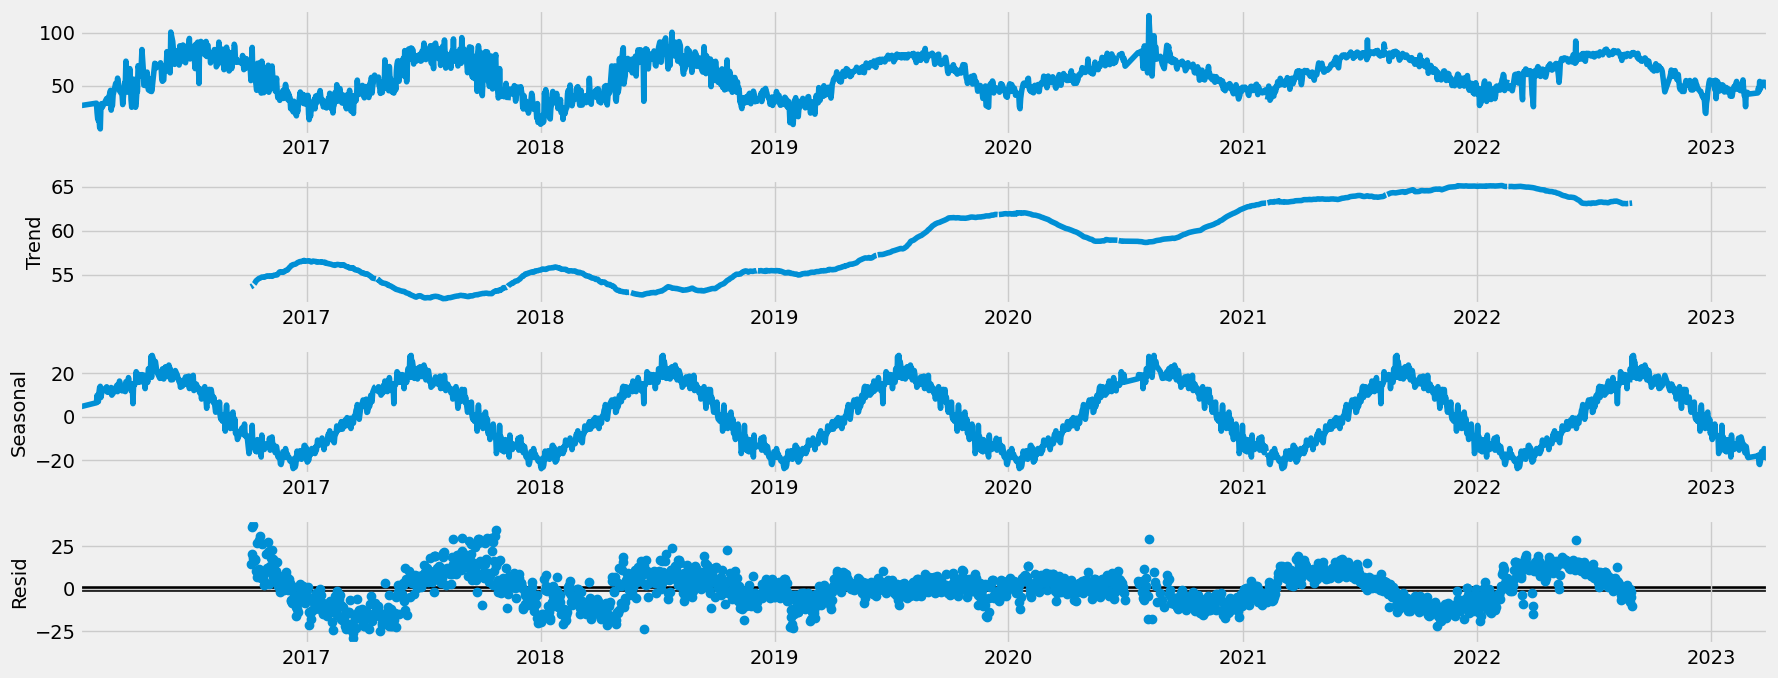

In [50]:
# Plot the separate components

decomposition.plot()
plt.show()

##### Observations - The 'seasonal' line seems very firm, which would make sense with the weather temperatures. It's interesting the 'trend' line is moving upwards.

### 4. Testing for stationarity

In [51]:
# The adfuller() function will import from the model from statsmodels for the test; however, running it will only return 
# an array of numbers. This is why you need to also define a function that prints the correct output from that array.

from statsmodels.tsa.stattools import adfuller # Import the adfuller() function

def dickey_fuller(timeseries): # Define the function
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(Date_TemperatureAvg['Temperature(F)'])

Dickey-Fuller Stationarity test:
Test Statistic                   -2.855934
p-value                           0.050717
Number of Lags Used              14.000000
Number of Observations Used    2416.000000
Critical Value (1%)              -3.433060
Critical Value (5%)              -2.862737
Critical Value (10%)             -2.567407
dtype: float64


In [ ]:
#Comparing the test statistic to the critical value of 1% and 5%, it is more than both of those values and less than the critical value of 10%. This indicates there is stationarity.
# The p-value being slightly/insignificantly more than .05 is something to note here.

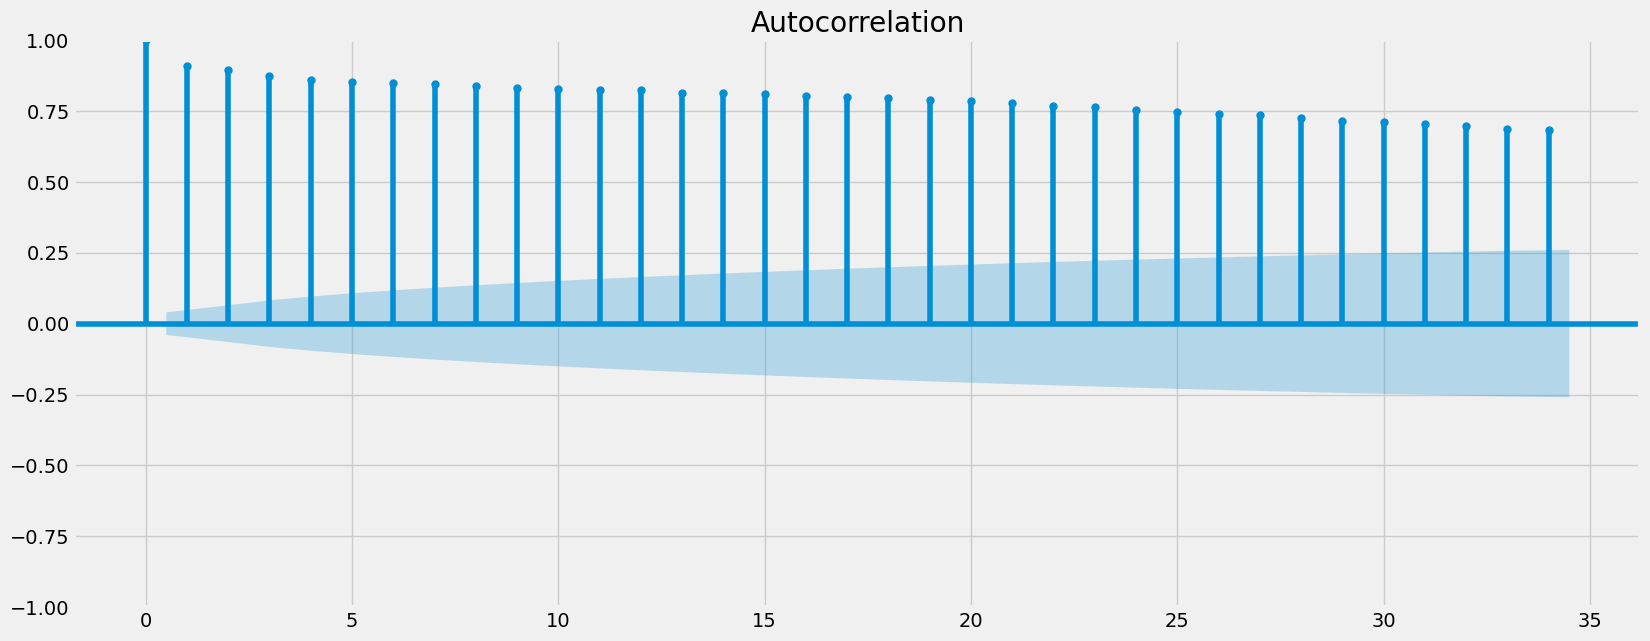

In [52]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf # Here, you import the autocorrelation and partial correlation plots

plot_acf(Date_TemperatureAvg)
plt.show()

In [53]:
# Observations - The blue area that represents confidence level does not go above any of the lines. This indiciates the lag intervals are not much correlated with each other
# and we can deduce that the stationarity is more genuine. 

In [10]:
# Exporting the changed weatherstamp/date df


df.to_csv(os.path.join(path, 'Data','df_clean.csv'))

In [9]:
# Exporting the changed weatherstamp/date df


df.to_csv(os.path.join(path, 'Data','df_clean.xlsx'))

In [11]:
# Exporting the changed weatherstamp/date df


df.to_csv(os.path.join(path, 'Data','df_clean.pdf'))

In [12]:
# Creating multiple dfs by year for tableau to hopefully read

In [10]:
# Convert 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

In [23]:
year_to_filter = 2016
df_2016 = df[df['Date'].dt.year == year_to_filter]


In [20]:
unique_values = df['Date'].unique()
print(unique_values)

<DatetimeArray>
['2016-02-08 00:53:00', '2016-02-08 07:53:00', '2016-02-08 11:51:00',
 '2016-02-08 15:12:00', '2016-02-08 15:47:00', '2016-02-08 17:36:00',
 '2016-02-08 17:28:00', '2016-02-08 20:12:00', '2016-02-08 20:54:00',
 '2016-02-08 21:15:00',
 ...
 '2019-08-23 09:54:00', '2019-08-23 11:47:00', '2019-08-23 12:47:00',
 '2019-08-23 14:47:00', '2019-08-23 01:20:00', '2019-08-23 03:52:00',
 '2019-08-23 12:52:00', '2019-08-23 13:52:00', '2019-08-23 12:58:00',
 '2019-08-23 20:50:00']
Length: 440185, dtype: datetime64[ns]


In [24]:
df_2016.head()

,ID,Source,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),...,Railway,Roundabout,Station,Stop,Traffic_Calming,Traffic_Signal,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight
0,A-3412645,Source1,3,2016-02-08 00:37:08,2016-02-08 06:37:08,40.108910,-83.092860,40.112060,-83.031870,3.230,...,0,0,0,0,0,0,0,0,0,0
1,A-3412650,Source1,3,2016-02-08 07:53:43,2016-02-08 13:53:43,39.172393,-84.492792,39.170476,-84.501798,0.500,...,0,0,0,0,0,0,1,1,1,1
2,A-3412654,Source1,2,2016-02-08 11:51:46,2016-02-08 17:51:46,41.375310,-81.820170,41.367860,-81.821740,0.521,...,0,0,0,0,0,0,1,1,1,1
3,A-3412656,Source1,2,2016-02-08 15:16:43,2016-02-08 21:16:43,40.109310,-82.968490,40.110780,-82.984000,0.826,...,0,0,0,0,0,0,1,1,1,1
4,A-3412657,Source1,2,2016-02-08 15:43:50,2016-02-08 21:43:50,39.192880,-84.477230,39.196150,-84.473350,0.307,...,0,0,0,0,0,0,1,1,1,1


In [25]:
df_2016.shape

(3652, 45)

In [26]:
year_to_filter = 2017
df_2017 = df[df['Date'].dt.year == year_to_filter]


In [27]:
year_to_filter = 2018
df_2018 = df[df['Date'].dt.year == year_to_filter]


In [29]:
year_to_filter = 2019
df_2019 = df[df['Date'].dt.year == year_to_filter]


In [28]:
year_to_filter = 2020
df_2020 = df[df['Date'].dt.year == year_to_filter]


In [30]:
year_to_filter = 2021
df_2021 = df[df['Date'].dt.year == year_to_filter]


In [11]:
year_to_filter = 2022
df_2022 = df[df['Date'].dt.year == year_to_filter]


In [12]:
year_to_filter = 2023
df_2023 = df[df['Date'].dt.year == year_to_filter]


In [33]:
df_2017.shape

(7754, 45)

In [34]:
df_2018.shape

(9549, 45)

In [35]:
df_2019.shape

(198640, 45)

In [36]:
df_2020.shape

(649321, 45)

In [37]:
df_2021.shape

(1035462, 45)

In [39]:
df_2022.shape

(1421060, 45)

In [40]:
df_2023.shape

(229087, 45)

In [ ]:
df_2016.to_excel('df_2016.xlsx', index=False)
df_2017.to_excel('df_2017.xlsx', index=False)
df_2018.to_excel('df_2018.xlsx', index=False)
df_2019.to_excel('df_2019.xlsx', index=False)
df_2020.to_excel('df_2020.xlsx', index=False)
df_2021.to_excel('df_2021.xlsx', index=False)

In [15]:
# Split the DataFrame in half
half_size = len(df_2022) // 2
df_2022_part1 = df_2022.iloc[:half_size]
df_2022_part2 = df_2022.iloc[half_size:]

# Save the first half to Excel
df_2022_part1.to_excel('df_2022_part1.xlsx', index=False)

# Save the second half to Excel
df_2022_part2.to_excel('df_2022_part2.xlsx', index=False)

In [14]:
df_2023.to_excel('df_2023.xlsx', index=False)

In [ ]:
df.to_excel('df.xlsx', index=False)